<a href="https://colab.research.google.com/github/28Aarya/FHI-score-for-stability/blob/main/FINAL_FINANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

In [ ]:
stocks = ['F', 'TM', 'RACE', 'GM','TSLA','NSANY','RIVN','HMC']

def fetch_metrics(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    # Define metrics inside the function, A dictionary is created to store selected metrics about the stock. Each key represents a financial metric, and its value is taken from the info dictionary.
    metrics = {
        'ticker': ticker,
        'currentRatio': info.get('currentRatio', None),#Shows if a company can pay short-term debts (higher = safer)
        'debtToEquity': info.get('debtToEquity', None), #How much debt the company has compared to its equity (lower = safer).
        'returnOnEquity': info.get('returnOnEquity', None), #How efficiently the company uses investors’ money to generate profit (higher = better).
        'priceToBook': info.get('priceToBook', None), #Compares the company’s market price to its actual book value (lower = undervalued).
        'earningsGrowth': info.get('earningsGrowth', None), #How much the company's earnings are growing (higher = better).
        'dividendYield': info.get('dividendYield', None), #How much a company pays in dividends relative to its stock price (higher = better for income investors)
        'beta': info.get('beta', None), #Measures how volatile the stock is compared to the market (beta > 1 = riskier, < 1 = safer).
        'revenue': info.get('totalRevenue', None)
    }

    return metrics

financial_data = [fetch_metrics(stock) for stock in stocks]
financial_df = pd.DataFrame(financial_data)
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.971749,-0.265,0.0546,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067255,-0.546,0.0296,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,23.777216,0.143,0.0060,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.833592,0.218,0.0087,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,16.101990,0.170,NaN,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003085,NaN,0.0526,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.052613,NaN,NaN,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009861,-0.592,0.0541,0.490,21617023385600


In [ ]:
financial_df.isnull().sum()

,0
ticker,0
currentRatio,0
debtToEquity,0
returnOnEquity,0
priceToBook,0
earningsGrowth,2
dividendYield,2
beta,0
revenue,0


In [ ]:
print(financial_df.loc[financial_df['dividendYield'].isnull(), ['ticker', 'dividendYield']])
print(financial_df.loc[financial_df['earningsGrowth'].isnull(), ['ticker', 'earningsGrowth']])

  ticker  dividendYield
4   TSLA            NaN
6   RIVN            NaN
  ticker  earningsGrowth
5  NSANY             NaN
6   RIVN             NaN


In [ ]:
financial_df['dividendYield'].fillna(00, inplace= True)
financial_df

<ipython-input-30-d65226946555>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_df['dividendYield'].fillna(00, inplace= True)


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.971749,-0.265,0.0546,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067255,-0.546,0.0296,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,23.777216,0.143,0.0060,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.833592,0.218,0.0087,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,16.101990,0.170,0.0000,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003085,NaN,0.0526,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.052613,NaN,0.0000,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009861,-0.592,0.0541,0.490,21617023385600


In [ ]:
def calculate_earnings_growth(eps_23, eps_24, ticker, financial_df):
  earnings_growth= (eps_24 - eps_23)/eps_23
  print(f"Earnings growth for {ticker}: {earnings_growth:.2f}")
  financial_df.loc[financial_df['ticker']==ticker, 'earningsGrowth']= earnings_growth

  return earnings_growth

nsany_23= 0.84
nsany_24= 1.53

rivn_23= -5.74
rivn_24= -1.44

calculate_earnings_growth(nsany_23, nsany_24, 'NSANY', financial_df)
calculate_earnings_growth(rivn_23, rivn_24, 'RIVN', financial_df)
financial_df

Earnings growth for NSANY: 0.82
Earnings growth for RIVN: -0.75


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.971749,-0.265000,0.0546,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067255,-0.546000,0.0296,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,23.777216,0.143000,0.0060,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.833592,0.218000,0.0087,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,16.101990,0.170000,0.0000,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003085,0.821429,0.0526,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.052613,-0.749129,0.0000,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009861,-0.592000,0.0541,0.490,21617023385600


In [ ]:
financial_df.describe()

,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00
mean,1.910000,131.768375,0.056752,5.477170,-0.099963,0.025700,1.276125,1.013667e+13
std,1.310902,101.610681,0.323347,9.184552,0.530724,0.025010,0.692289,1.671989e+13
min,1.147000,18.078000,-0.671570,0.003085,-0.749129,0.000000,0.404000,4.551000e+09
25%,1.224000,90.103750,0.066715,0.052907,-0.557500,0.004500,0.822250,7.447863e+10
50%,1.484500,102.994000,0.104605,0.902670,-0.061000,0.019150,1.203000,1.827310e+11
75%,1.805750,134.278250,0.157225,5.564957,0.182000,0.052975,1.738250,1.485920e+13
max,5.089000,359.359000,0.463760,23.777216,0.821429,0.054600,2.295000,4.639616e+13


In [ ]:
#standardise the data
std_columns= financial_df.columns[1:]
financial_df[std_columns]= financial_df[std_columns].apply(lambda x: (x - x.mean())/x.std())
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,-0.582042,2.239830,0.071587,-0.490543,-0.310967,1.155517,0.519833,-0.595335
1,TM,-0.519490,-0.277908,0.213973,-0.589023,-0.840432,0.155935,-1.259770,2.168643
2,RACE,-0.283774,-0.385878,1.258735,1.992481,0.457794,-0.787671,-0.410414,-0.605878
3,GM,-0.534746,0.421340,0.262621,-0.505586,0.599111,-0.679716,0.199158,-0.595336
4,TSLA,-0.050347,-1.118882,0.455046,1.156814,0.508668,-1.027570,1.471748,-0.600454
5,NSANY,-0.089252,-0.107512,-0.091519,-0.596010,1.736102,1.075550,-0.495638,0.147723
6,RIVN,2.425048,-0.288458,-2.252452,-0.372861,-1.223171,-1.027570,1.110627,-0.605992
7,HMC,-0.365397,-0.482532,0.082010,-0.595272,-0.927106,1.135525,-1.135544,0.686628


In [ ]:
weights = {
    'stability': {
        'currentRatio': 0.35,
        'debtToEquity': 0.3,
        'beta': 0.2,
        'dividendYield': 0.075,
        'returnOnEquity': 0.05,
        'priceToBook': 0.025,
        'revenue': 0.025,
        'earningsGrowth': 0.025
    },

    'growth': {
        'earningsGrowth': 0.35,
        'revenue': 0.3,
        'returnOnEquity': 0.2,
        'debtToEquity': 0.075,
        'priceToBook': 0.05,
        'beta': 0.025,
        'dividendYield': 0.025,
        'currentRatio': 0.025
    },

    'Value': {
        'priceToBook': 0.35,
        'dividendYield': 0.3,
        'debtToEquity': 0.2,
        'returnOnEquity': 0.075,
        'revenue': 0.05,
        'earningsGrowth': 0.025,
        'currentRatio': 0.025,
        'beta': 0.025
    }
}


In [ ]:
def calculate_fhi(metrics, weights):
    fhi_score = 0

    for metric, weight in weights.items():
        if metric in metrics and metrics[metric] is not None:
            fhi_score += metrics[metric] * weight

    return fhi_score


In [ ]:
def get_user_choice():
    print("What are you looking for in the stock market?")
    print("1. Stability")
    print("2. Growth")
    print("3. Value")

    choice = input("Enter your choice (1/2/3): ")

    if choice == '1':
        return 'stability'
    elif choice == '2':
        return 'growth'
    elif choice == '3':
        return 'Value'
    else:
        print("Invalid input. Please enter a valid number (1/2/3).")
        return get_user_choice()


user_choice = get_user_choice()

chosen_weights = weights[user_choice]
def calculate_fhi_for_stocks(df, chosen_weights):
    df['FHI'] = df.apply(lambda row: calculate_fhi(row[chosen_weights.keys()], chosen_weights), axis=1)
    return df

financial_df = calculate_fhi_for_stocks(financial_df, chosen_weights)
print(financial_df[['ticker', 'FHI']])


What are you looking for in the stock market?
1. Stability
2. Growth
3. Value
Enter your choice (1/2/3): 2
  ticker       FHI
0      F -0.102328
1     TM  0.308359
2   RACE  0.263848
3     GM  0.064551
4   TSLA  0.072677
5  NSANY  0.608051
6   RIVN -1.037973
7    HMC -0.177186


In [ ]:
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI
0,F,-0.582042,2.239830,0.071587,-0.490543,-0.310967,1.155517,0.519833,-0.595335,-0.102328
1,TM,-0.519490,-0.277908,0.213973,-0.589023,-0.840432,0.155935,-1.259770,2.168643,0.308359
2,RACE,-0.283774,-0.385878,1.258735,1.992481,0.457794,-0.787671,-0.410414,-0.605878,0.263848
3,GM,-0.534746,0.421340,0.262621,-0.505586,0.599111,-0.679716,0.199158,-0.595336,0.064551
4,TSLA,-0.050347,-1.118882,0.455046,1.156814,0.508668,-1.027570,1.471748,-0.600454,0.072677
5,NSANY,-0.089252,-0.107512,-0.091519,-0.596010,1.736102,1.075550,-0.495638,0.147723,0.608051
6,RIVN,2.425048,-0.288458,-2.252452,-0.372861,-1.223171,-1.027570,1.110627,-0.605992,-1.037973
7,HMC,-0.365397,-0.482532,0.082010,-0.595272,-0.927106,1.135525,-1.135544,0.686628,-0.177186


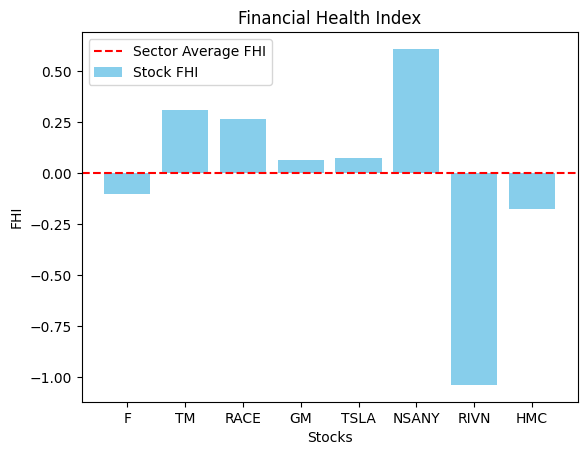

In [ ]:
sector_avg_fhi = financial_df['FHI'].mean()

plt.axhline(y=sector_avg_fhi, color='r', linestyle='--', label='Sector Average FHI')
plt.bar(financial_df['ticker'], financial_df['FHI'], color='skyblue', label='Stock FHI')
plt.title('Financial Health Index')
plt.xlabel('Stocks')
plt.ylabel('FHI')
plt.legend()
plt.show()

In [ ]:
financial_df['Performance']= financial_df["FHI"].apply(lambda x: "Overperforming" if x > sector_avg_fhi else "Underperforming")
print(financial_df[['ticker', 'FHI', 'Performance']])

  ticker       FHI      Performance
0      F -0.102328  Underperforming
1     TM  0.308359   Overperforming
2   RACE  0.263848   Overperforming
3     GM  0.064551   Overperforming
4   TSLA  0.072677   Overperforming
5  NSANY  0.608051   Overperforming
6   RIVN -1.037973  Underperforming
7    HMC -0.177186  Underperforming


In [ ]:
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI,Performance
0,F,-0.582042,2.239830,0.071587,-0.490543,-0.310967,1.155517,0.519833,-0.595335,-0.102328,Underperforming
1,TM,-0.519490,-0.277908,0.213973,-0.589023,-0.840432,0.155935,-1.259770,2.168643,0.308359,Overperforming
2,RACE,-0.283774,-0.385878,1.258735,1.992481,0.457794,-0.787671,-0.410414,-0.605878,0.263848,Overperforming
3,GM,-0.534746,0.421340,0.262621,-0.505586,0.599111,-0.679716,0.199158,-0.595336,0.064551,Overperforming
4,TSLA,-0.050347,-1.118882,0.455046,1.156814,0.508668,-1.027570,1.471748,-0.600454,0.072677,Overperforming
5,NSANY,-0.089252,-0.107512,-0.091519,-0.596010,1.736102,1.075550,-0.495638,0.147723,0.608051,Overperforming
6,RIVN,2.425048,-0.288458,-2.252452,-0.372861,-1.223171,-1.027570,1.110627,-0.605992,-1.037973,Underperforming
7,HMC,-0.365397,-0.482532,0.082010,-0.595272,-0.927106,1.135525,-1.135544,0.686628,-0.177186,Underperforming


In [ ]:
new_df= financial_df[['ticker', 'revenue','beta','FHI','Performance']]
new_df

,ticker,revenue,beta,FHI,Performance
0,F,-0.595335,0.519833,-0.102328,Underperforming
1,TM,2.168643,-1.259770,0.308359,Overperforming
2,RACE,-0.605878,-0.410414,0.263848,Overperforming
3,GM,-0.595336,0.199158,0.064551,Overperforming
4,TSLA,-0.600454,1.471748,0.072677,Overperforming
5,NSANY,0.147723,-0.495638,0.608051,Overperforming
6,RIVN,-0.605992,1.110627,-1.037973,Underperforming
7,HMC,0.686628,-1.135544,-0.177186,Underperforming


In [ ]:
financial_df['FHI_zscore'] = (financial_df['FHI'] - financial_df['FHI'].mean()) / financial_df['FHI'].std()
#detect the outliers

def detect_outliers(FHI_zscore, financial_df):
    if FHI_zscore > 1.00:
        return 'Overvalued'
    elif FHI_zscore < -1.00:
      return 'Undervalued'
    else:
      return 'Fairly Valued'

financial_df['Valuation']= financial_df['FHI_zscore'].apply(lambda x: detect_outliers(x, financial_df))
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI,Performance,FHI_zscore,Valuation
0,F,-0.582042,2.239830,0.071587,-0.490543,-0.310967,1.155517,0.519833,-0.595335,-0.102328,Underperforming,-0.209934,Fairly Valued
1,TM,-0.519490,-0.277908,0.213973,-0.589023,-0.840432,0.155935,-1.259770,2.168643,0.308359,Overperforming,0.632620,Fairly Valued
2,RACE,-0.283774,-0.385878,1.258735,1.992481,0.457794,-0.787671,-0.410414,-0.605878,0.263848,Overperforming,0.541303,Fairly Valued
3,GM,-0.534746,0.421340,0.262621,-0.505586,0.599111,-0.679716,0.199158,-0.595336,0.064551,Overperforming,0.132430,Fairly Valued
4,TSLA,-0.050347,-1.118882,0.455046,1.156814,0.508668,-1.027570,1.471748,-0.600454,0.072677,Overperforming,0.149102,Fairly Valued
5,NSANY,-0.089252,-0.107512,-0.091519,-0.596010,1.736102,1.075550,-0.495638,0.147723,0.608051,Overperforming,1.247459,Overvalued
6,RIVN,2.425048,-0.288458,-2.252452,-0.372861,-1.223171,-1.027570,1.110627,-0.605992,-1.037973,Underperforming,-2.129472,Undervalued
7,HMC,-0.365397,-0.482532,0.082010,-0.595272,-0.927106,1.135525,-1.135544,0.686628,-0.177186,Underperforming,-0.363508,Fairly Valued


In [ ]:
new_df= financial_df[['ticker', 'revenue','beta','FHI','Performance','Valuation']]
new_df

,ticker,revenue,beta,FHI,Performance,Valuation
0,F,-0.595335,0.519833,-0.102328,Underperforming,Fairly Valued
1,TM,2.168643,-1.259770,0.308359,Overperforming,Fairly Valued
2,RACE,-0.605878,-0.410414,0.263848,Overperforming,Fairly Valued
3,GM,-0.595336,0.199158,0.064551,Overperforming,Fairly Valued
4,TSLA,-0.600454,1.471748,0.072677,Overperforming,Fairly Valued
5,NSANY,0.147723,-0.495638,0.608051,Overperforming,Overvalued
6,RIVN,-0.605992,1.110627,-1.037973,Underperforming,Undervalued
7,HMC,0.686628,-1.135544,-0.177186,Underperforming,Fairly Valued
